## <h3><b>MLP</b></h3>

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics 
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

<h4> <b>Import Dataset</b></h4>

In [2]:
#Reading the dataset
df= pd.read_csv('/Users/jyoti/OneDrive/DLFinal/Project2/Datasets/MLModels.csv')
df.head(5)

,Enrollment_ID,Access,Discussion,Navigate,Page Close,Problems,Video,Session,Wiki,Total_Time,Result
0,1,178.0,0.0,0.0,0.0,148.0,47.0,15,0.0,425.933333,0
1,4,162.0,0.0,0.0,0.0,23.0,14.0,12,0.0,261.616667,0
2,9,84.0,0.0,0.0,0.0,8.0,3.0,7,0.0,340.000000,1
3,12,72.0,0.0,0.0,0.0,0.0,51.0,10,0.0,297.500000,0
4,14,112.0,0.0,0.0,0.0,32.0,10.0,9,0.0,368.800000,1


<h4><b>Data Preprocessing</b></h4>

In [3]:
#Splitting into X(Features) and Y(Label)
X = df.loc[:,['Enrollment_ID', 'Access', 'Discussion', 'Navigate', 'Page Close',
       'Problems', 'Video', 'Session', 'Wiki', 'Total_Time']] 

In [4]:
Y = df['Result']

In [5]:
#Splitting into Train and Test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6982, 10)
(1746, 10)
(6982,)
(1746,)


In [6]:
# Data Normalisation
X_train = X_train / 255
X_test = X_test / 255

<h4> <b> Model Implementation</b></h4>

In [15]:
#Model Implementation
MLP = MLPClassifier(hidden_layer_sizes=(256,128,64), max_iter=300,activation = 'relu',solver='adam', random_state=1, n_iter_no_change=100)
MLP.fit(X_train,Y_train)

/Users/jyoti/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(256, 128, 64), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=100, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

<h4><b> Results</b></h4>

In [16]:
y_prediction = MLP.predict(X_test)

In [17]:
# Calculation of Accuracy, Precision and Recall
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
confusion_matrix(Y_test, y_prediction)
# calculate prec, recall, accuracy
print("Prec: "+ str(precision_score(Y_test, y_prediction, average='weighted')))
print("Recall: "+ str(recall_score(Y_test, y_prediction, average='weighted')))
print("Accuracy: " + str(accuracy_score(Y_test, y_prediction)))

Prec: 0.806722023684774
Recall: 0.8092783505154639
Accuracy: 0.8092783505154639


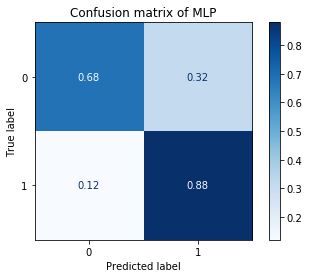

In [18]:
# Confusion Matrix
matrix = plot_confusion_matrix(MLP, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix of MLP')
plt.show(matrix)